In [8]:
import os
import shutil
import random

# Thư mục gốc chứa dữ liệu
data_dir = 'dataset'  # Thay đổi đường dẫn này thành đường dẫn thực tế của bạn

# Thư mục đích chứa tập huấn luyện và tập kiểm tra
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Tạo các thư mục nếu chúng chưa tồn tại
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Tạo thư mục con cho chó và mèo trong tập huấn luyện và tập kiểm tra
for class_name in ['dog', 'cat']:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Lấy danh sách tất cả các tệp tin trong thư mục dữ liệu
file_list = os.listdir(data_dir)

# Lặp qua từng tệp tin và di chuyển vào thư mục tương ứng trong tập huấn luyện hoặc tập kiểm tra
for file_name in file_list:
    if file_name.startswith('dog'):
        class_name = 'dog'
    elif file_name.startswith('cat'):
        class_name = 'cat'
    else:
        continue  # Bỏ qua các tệp tin không phải hình ảnh chó hoặc mèo
    
    # Chia tỷ lệ dữ liệu thành 80% cho tập huấn luyện và 20% cho tập kiểm tra
    if random.random() < 0.8:
        shutil.copy(os.path.join(data_dir, file_name), os.path.join(train_dir, class_name))
    else:
        shutil.copy(os.path.join(data_dir, file_name), os.path.join(test_dir, class_name))
        
# Xác định nhãn: Gán nhãn 0 cho chó và nhãn 1 cho mèo
# Lưu ý: Đây chỉ là ví dụ, bạn cần điều chỉnh phù hợp với cách xác định nhãn của dữ liệu của bạn
labels = {'dog': 0, 'cat': 1}

# In số lượng hình ảnh trong từng thư mục
for class_name, label in labels.items():
    train_count = len(os.listdir(os.path.join(train_dir, class_name)))
    test_count = len(os.listdir(os.path.join(test_dir, class_name)))
    print(f'Train {class_name} images: {train_count}')
    print(f'Test {class_name} images: {test_count}')


Train dog images: 10015
Test dog images: 2485
Train cat images: 10051
Test cat images: 2449


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn đến thư mục chứa dữ liệu huấn luyện và kiểm tra
train_data_dir = 'dataset/train'
test_data_dir = 'dataset/test'

# Thiết lập các tham số cho dữ liệu
batch_size = 32
target_size = (150, 150)  # Kích thước ảnh đầu vào của mô hình

# Sử dụng ImageDataGenerator để load dữ liệu và thực hiện tiền xử lý
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale giá trị pixel về khoảng [0, 1]

test_datagen = ImageDataGenerator(rescale=1./255)

# Tạo generator cho tập huấn luyện và tập kiểm tra
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'  # Chỉ có 2 lớp: chó và mèo
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)


C:\Users\MAC\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 20066 images belonging to 2 classes.
Found 4934 images belonging to 2 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Xây dựng một mô hình CNN đơn giản
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Vì chỉ có 2 lớp, nên sử dụng activation sigmoid
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Đào tạo mô hình bằng phương pháp generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Sau khi đào tạo, bạn có thể đánh giá mô hình, làm dự đoán trên dữ liệu mới, và tiếp tục tinh chỉnh.
# Đánh giá mô hình trên tập dữ liệu kiểm tra
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


C:\Users\MAC\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


C:\Users\MAC\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


627/627 ━━━━━━━━━━━━━━━━━━━━ 531s 834ms/step - accuracy: 0.5859 - loss: 0.6609 - val_accuracy: 0.7096 - val_loss: 0.5601
Epoch 2/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step - accuracy: 0.7500 - loss: 0.2311 - val_accuracy: 0.6667 - val_loss: 0.3387
Epoch 3/10


C:\Users\MAC\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


627/627 ━━━━━━━━━━━━━━━━━━━━ 483s 769ms/step - accuracy: 0.7130 - loss: 0.5478 - val_accuracy: 0.7922 - val_loss: 0.4534
Epoch 4/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 110us/step - accuracy: 0.8438 - loss: 0.1844 - val_accuracy: 0.6667 - val_loss: 0.3690
Epoch 5/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 489s 779ms/step - accuracy: 0.7970 - loss: 0.4290 - val_accuracy: 0.8326 - val_loss: 0.3874
Epoch 6/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 79us/step - accuracy: 0.8750 - loss: 0.1367 - val_accuracy: 0.6667 - val_loss: 0.1708
Epoch 7/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 497s 791ms/step - accuracy: 0.8563 - loss: 0.3270 - val_accuracy: 0.8488 - val_loss: 0.3532
Epoch 8/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 129us/step - accuracy: 0.8750 - loss: 0.1568 - val_accuracy: 0.8333 - val_loss: 0.1067
Epoch 9/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 507s 808ms/step - accuracy: 0.8882 - loss: 0.2640 - val_accuracy: 0.8468 - val_loss: 0.3538
Epoch 10/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 66us/step - accuracy: 0.8438 - loss: 0.1416 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
[[1.8898634e-05]
 [5.7613716e-02]
 [4.4947927e-05]
 [2.7482268e-01]
 [7.9454988e-01]
 [7.7494490e-01]
 [2.4535557e-02]
 [9.9678928e-01]
 [1.0153337e-02]
 [2.8644714e-01]
 [9.9169976e-01]
 [5.1900260e-03]
 [2.7243330e-05]
 [4.5351696e-04]
 [8.7664855e-01]
 [9.6565902e-01]
 [9.9105322e-01]
 [1.7334156e-03]
 [9.0647500e-04]
 [5.4441488e-01]
 [2.9855365e-01]
 [1.5298760e-03]
 [1.0787551e-01]
 [6.2640858e-01]
 [7.4376357e-01]
 [4.8365122e-01]
 [1.9047892e-01]
 [3.4282264e-01]
 [9.7405165e-01]
 [2.1843677e-02]
 [3.1978619e-01]
 [1.3915925e-01]]
32


ValueError: num must be 1 <= num <= 25, not 26

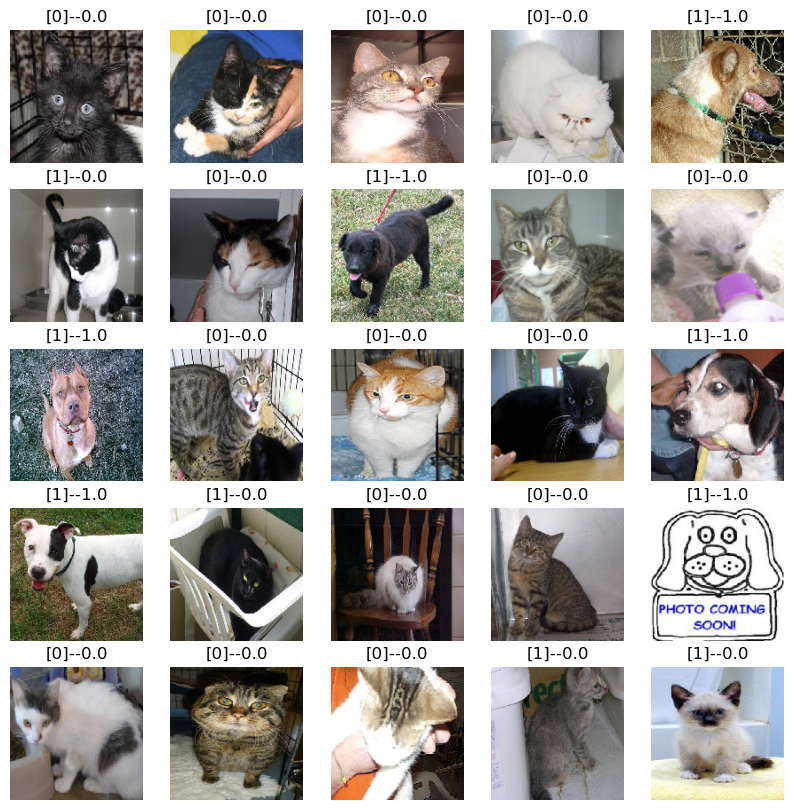

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy một batch từ tập dữ liệu kiểm tra
test_images, test_labels = next(test_generator)

# Dự đoán nhãn của các hình ảnh trong batch
predictions = model.predict(test_images)
print(predictions)
# Chuyển đổi nhãn dự đoán từ dạng xác suất (0-1) sang nhãn nhị phân (0 hoặc 1)
predicted_labels = np.round(predictions).astype(int)
print(len(test_images))
# Hiển thị hình ảnh và nhãn dự đoán của chúng
plt.figure(figsize=(10, 10))
for i in range(len(test_images)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"{predicted_labels[i]}--{test_labels[i]}")
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Thiết lập các tham số
learning_rates = [0.001, 0.01, 0.1]
epochs = [10, 20, 30]
batch_sizes = [16, 32, 64]

# Duyệt qua các tham số và thử nghiệm
for lr in learning_rates:
    for epoch in epochs:
        for batch_size in batch_sizes:
            # Xây dựng mô hình
            model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                MaxPooling2D((2, 2)),
                Conv2D(64, (3, 3), activation='relu'),
                MaxPooling2D((2, 2)),
                Conv2D(128, (3, 3), activation='relu'),
                MaxPooling2D((2, 2)),
                Conv2D(128, (3, 3), activation='relu'),
                MaxPooling2D((2, 2)),
                Flatten(),
                Dense(512, activation='relu'),
                Dense(1, activation='sigmoid')
            ])
            
            # Biên dịch mô hình với optimizer Adam và learning rate tương ứng
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer,
                          loss='binary_crossentropy',
                          metrics=['accuracy'])
            
            # Đào tạo mô hình
            history = model.fit(
                train_generator,
                steps_per_epoch=train_generator.samples // batch_size,
                epochs=epoch,
                validation_data=test_generator,
                validation_steps=test_generator.samples // batch_size,
                verbose=0
            )
            
            # In kết quả
            print(f"Learning rate: {lr}, Epochs: {epoch}, Batch size: {batch_size}")
            print("Train accuracy:", history.history['accuracy'][-1])
            print("Validation accuracy:", history.history['val_accuracy'][-1])
            print()
